# Baseball Case Study

In [1]:
#Importing all the library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Importing data

In [3]:
df = pd.read_csv("baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# The shape of the data frame.

In [6]:
df.shape

(30, 17)

# checking for null value

<Axes: >

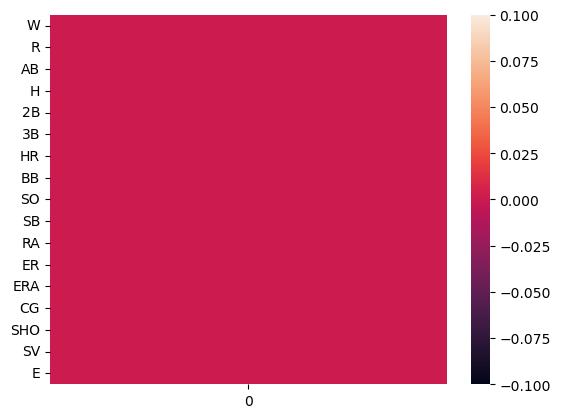

In [7]:
sns.heatmap(df.isnull().sum().to_frame())

# Basic information about dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No need to change the datatype they are appropriate so we can skip the step of data conversion Now directly jumps to Visualization.

# Visualization

Now, let’s visualize the distribution of continuous features.

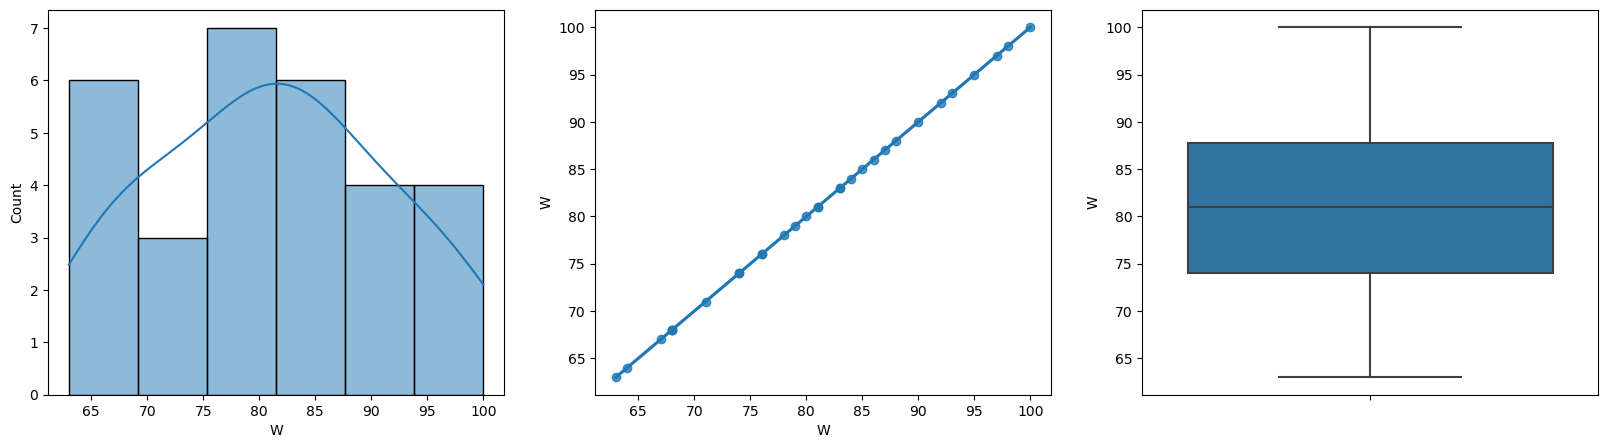

In [9]:
i = "W"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

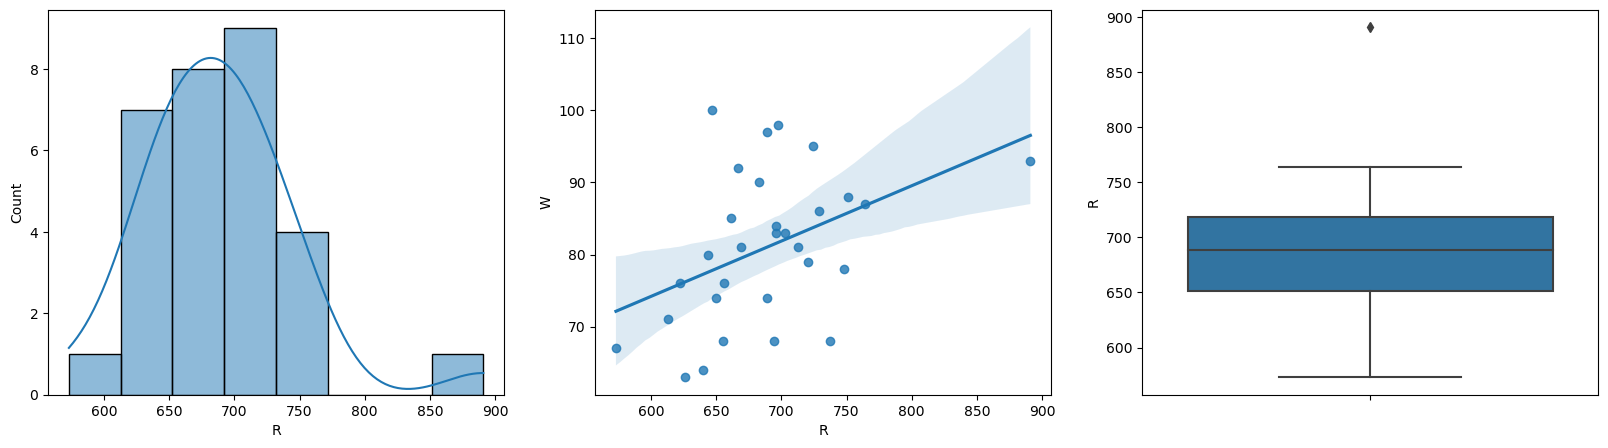

In [10]:
i = "R"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Run and win are linearly correlated. And outliers are present between 850 and 900.

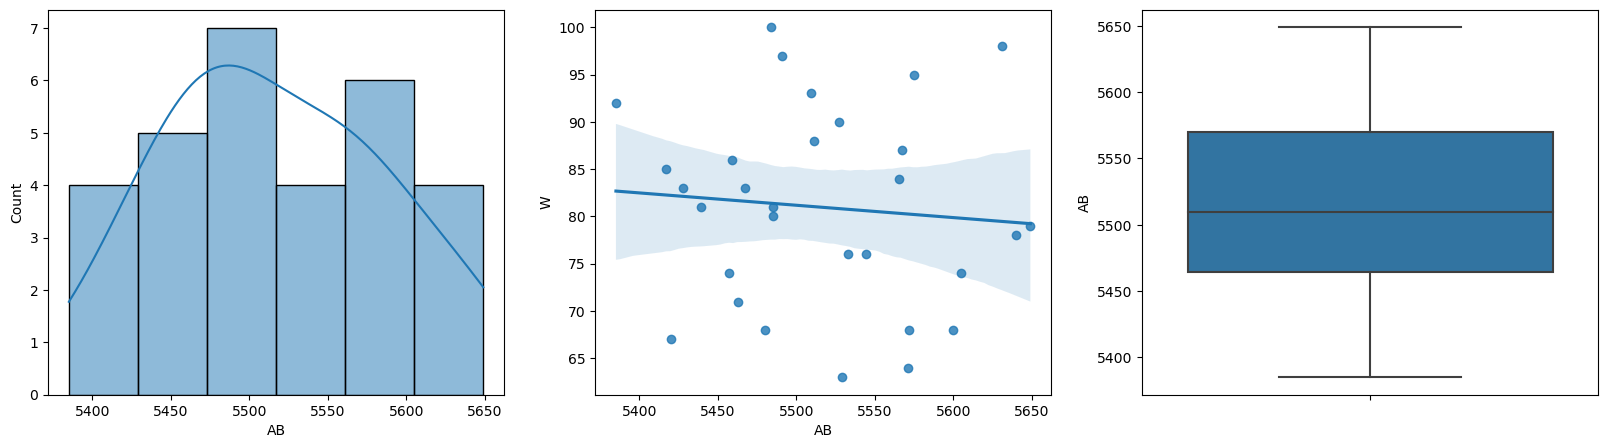

In [11]:
i = "AB"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

At balls is very weekly related to Wins With no outliers.

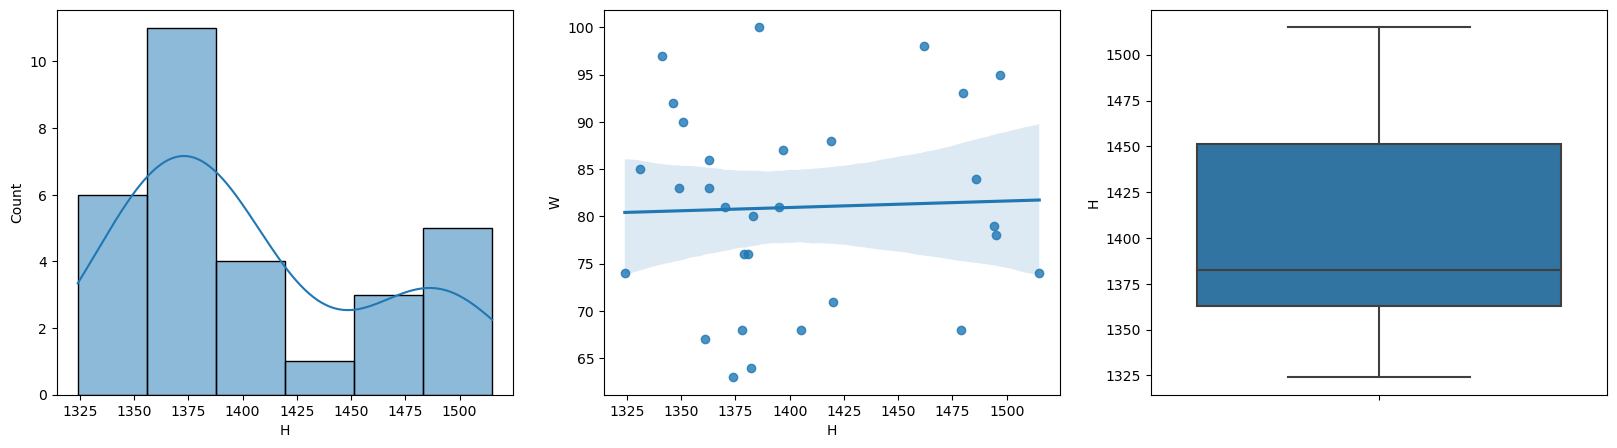

In [12]:
i = "H"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Hits are also very weekly related to winning with no outliers.

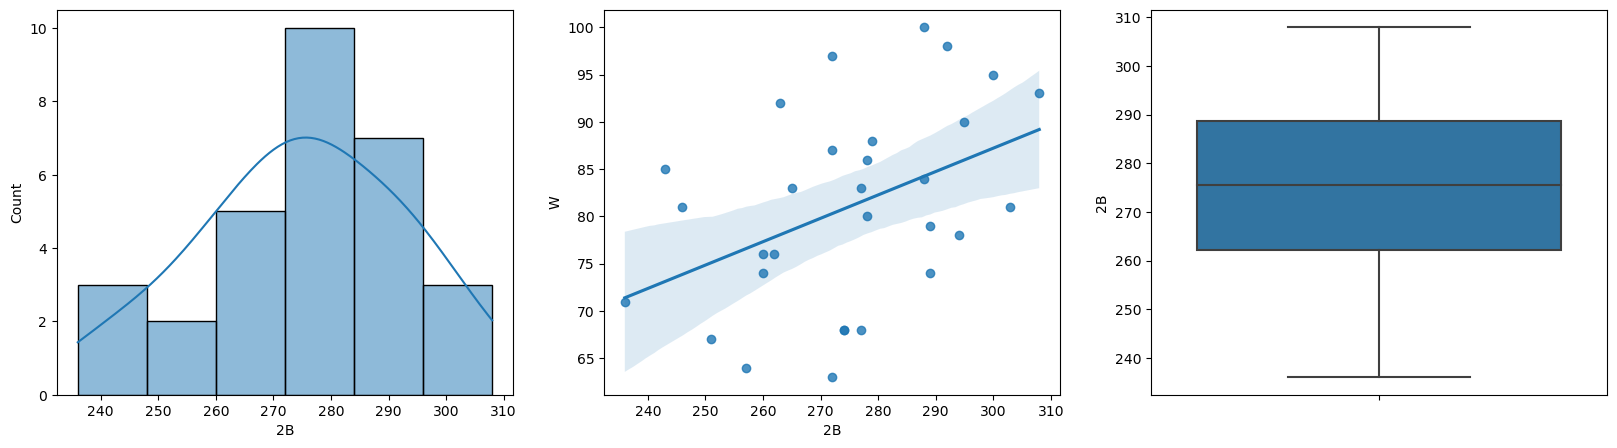

In [13]:
i = "2B"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Doubles are linearly related with Wins, with no outlier, and data is left-skewed.

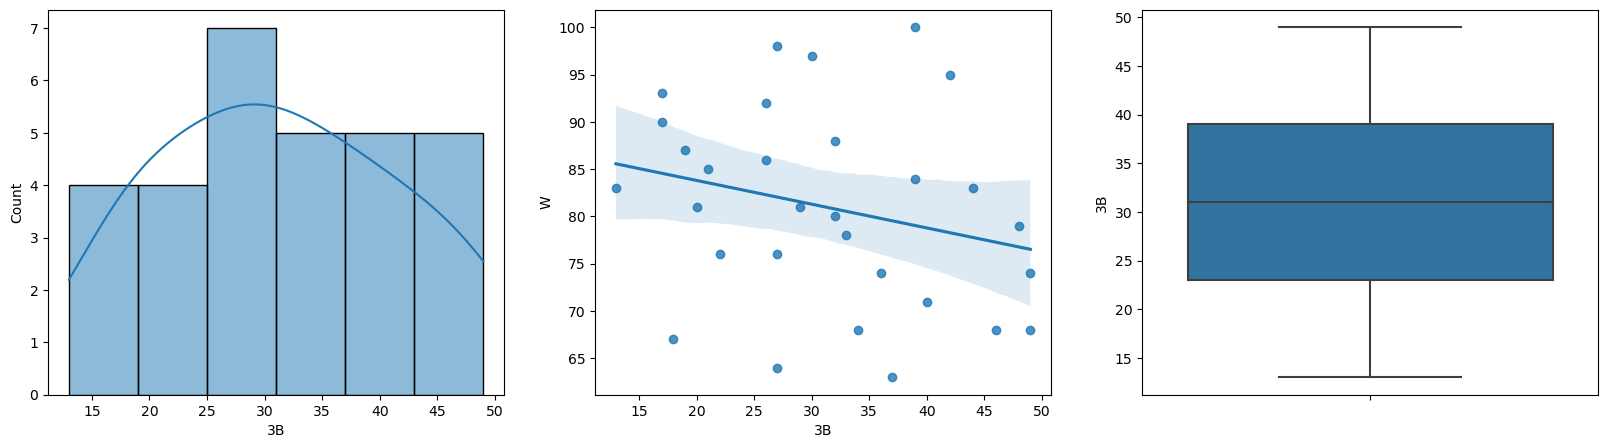

In [14]:
i = "3B"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Triple has very weak negative correlations with win with no outlier and data is right-skewed.

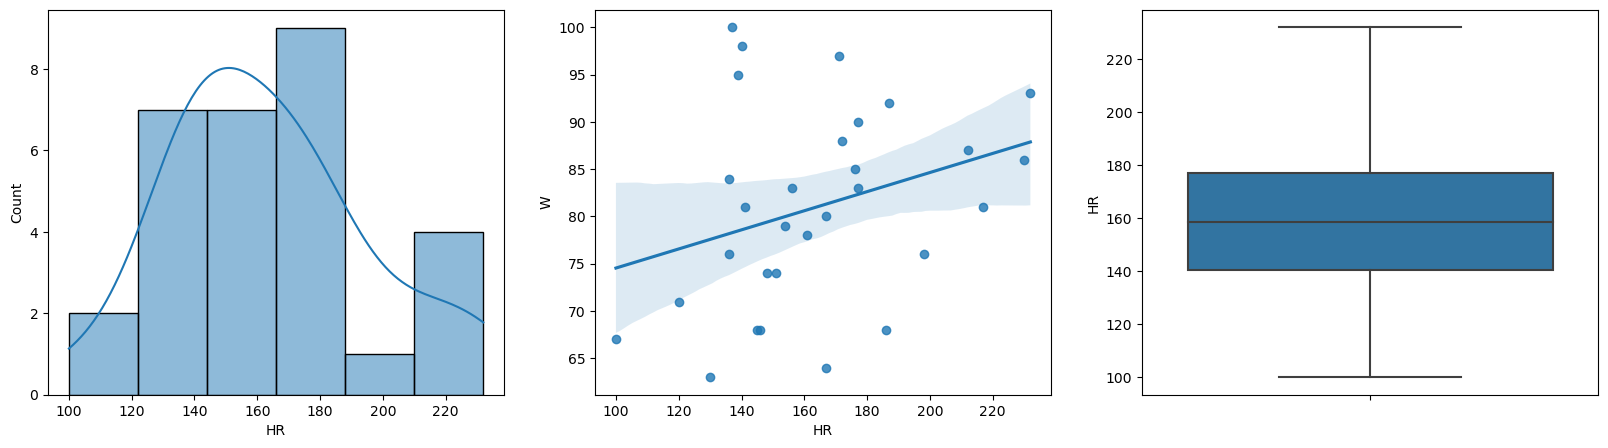

In [15]:
i = "HR"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

The home run has a very low correlation with wins with no lot of outliers and data is right-skewed.

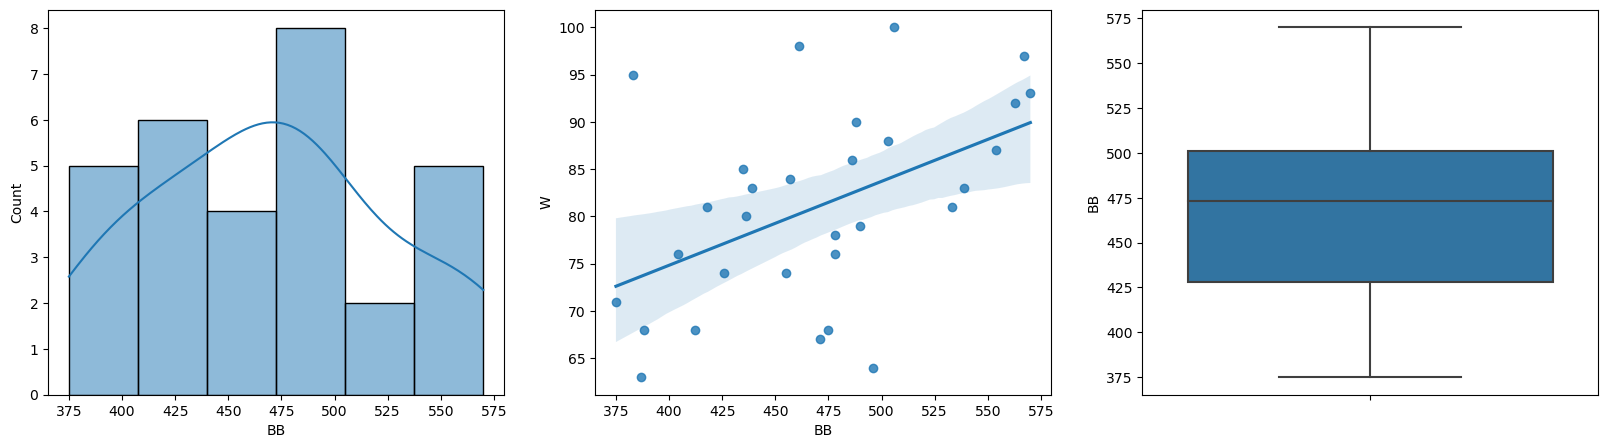

In [16]:
i = "BB"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Walk is lightly correlated to win with no outlier.

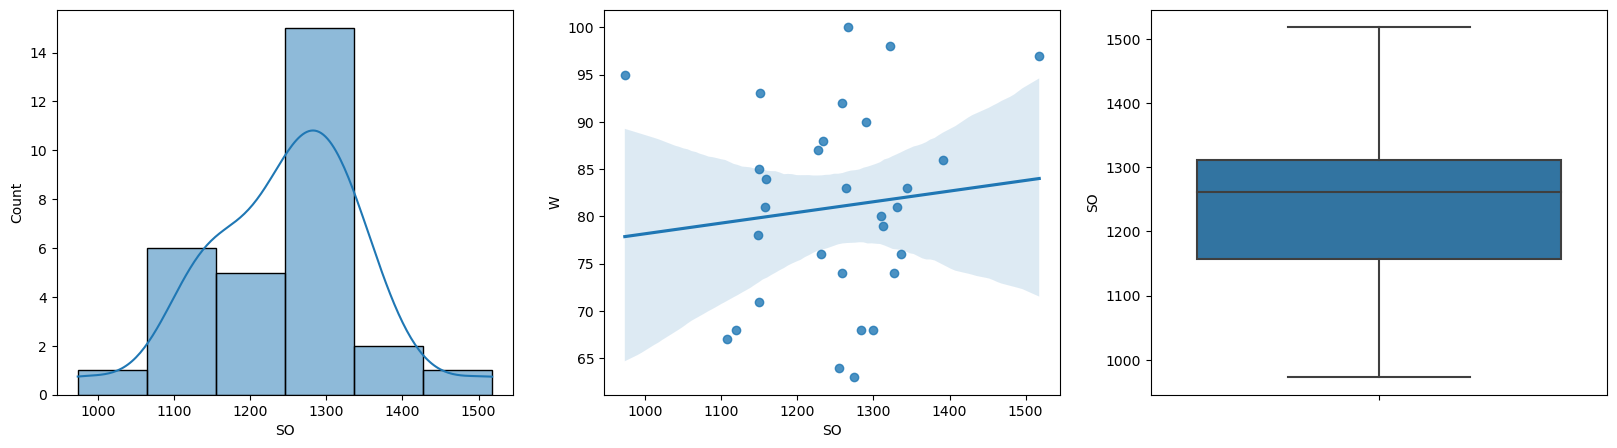

In [17]:
i = "SO"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Strikeout is not correlated to win with no outlier and the dataset is left-skewed.

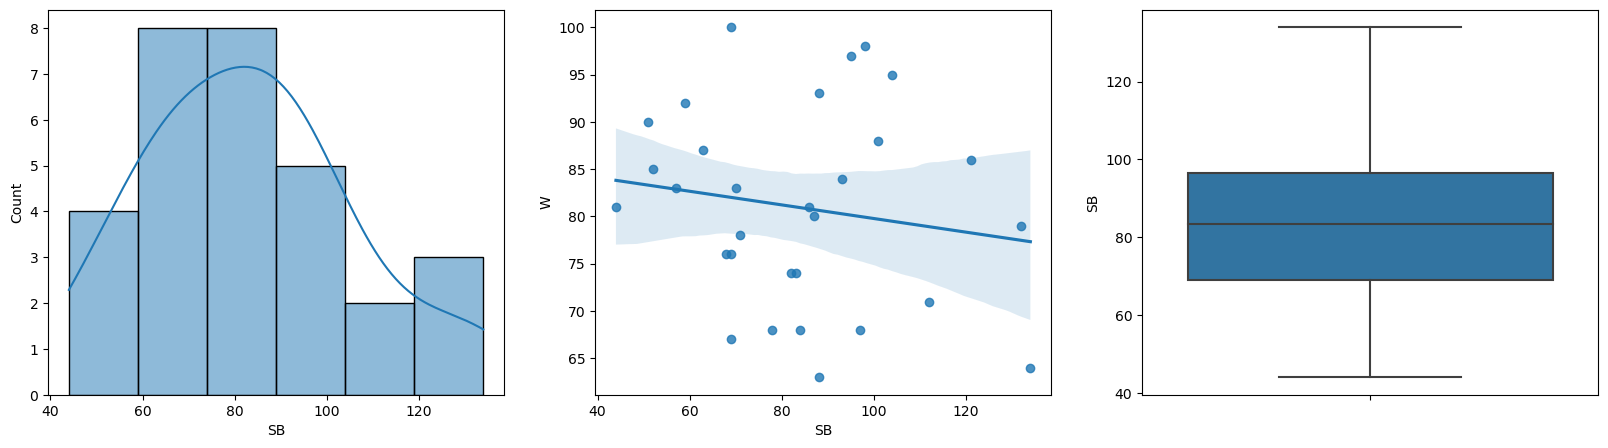

In [18]:
i = "SB"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Stolen Bases is not correlated to win with no outlier.

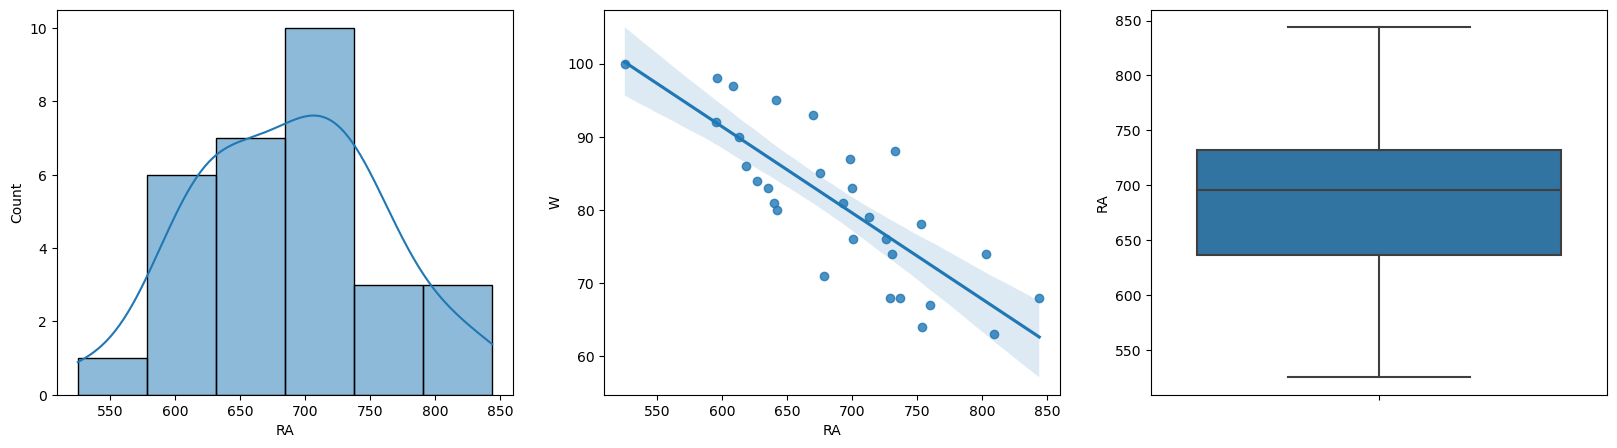

In [19]:
i = "RA"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Stolen Bases is not correlated to win with no outlier.

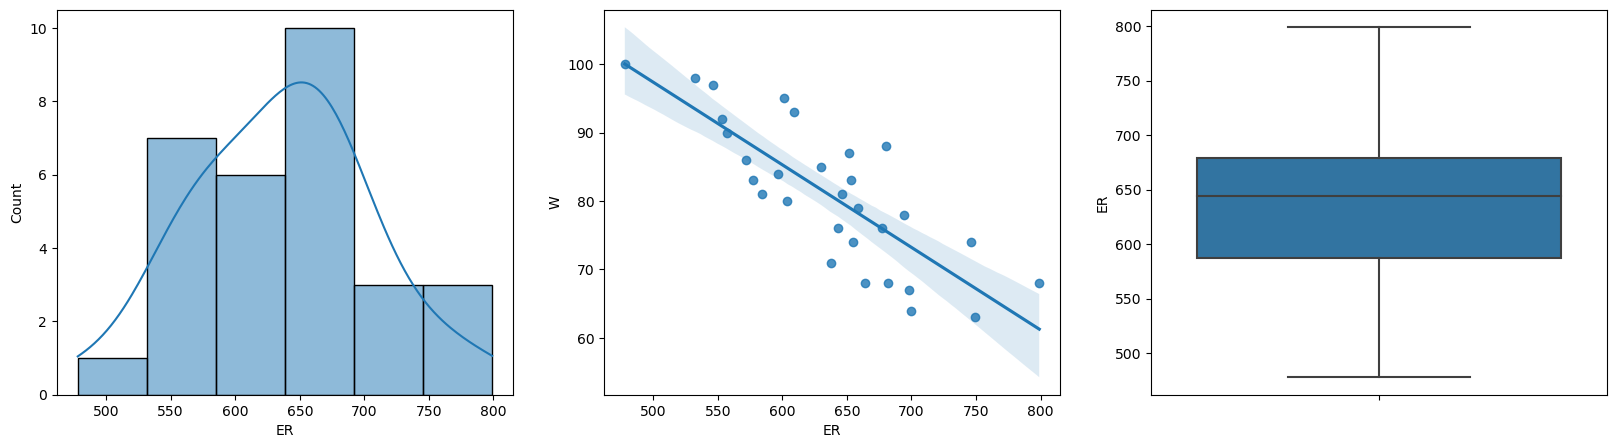

In [20]:
i = "ER"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Runs Allowed is highly correlated to win with no outliers.

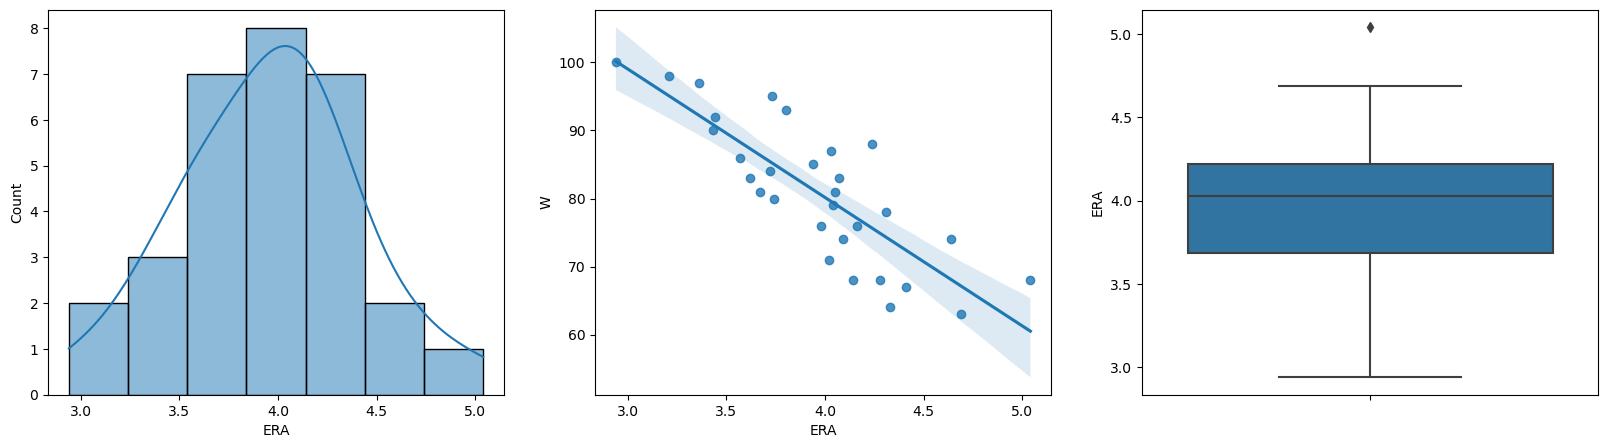

In [21]:
i = "ERA"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Earned Runs is highly correlated to win with no outliers.

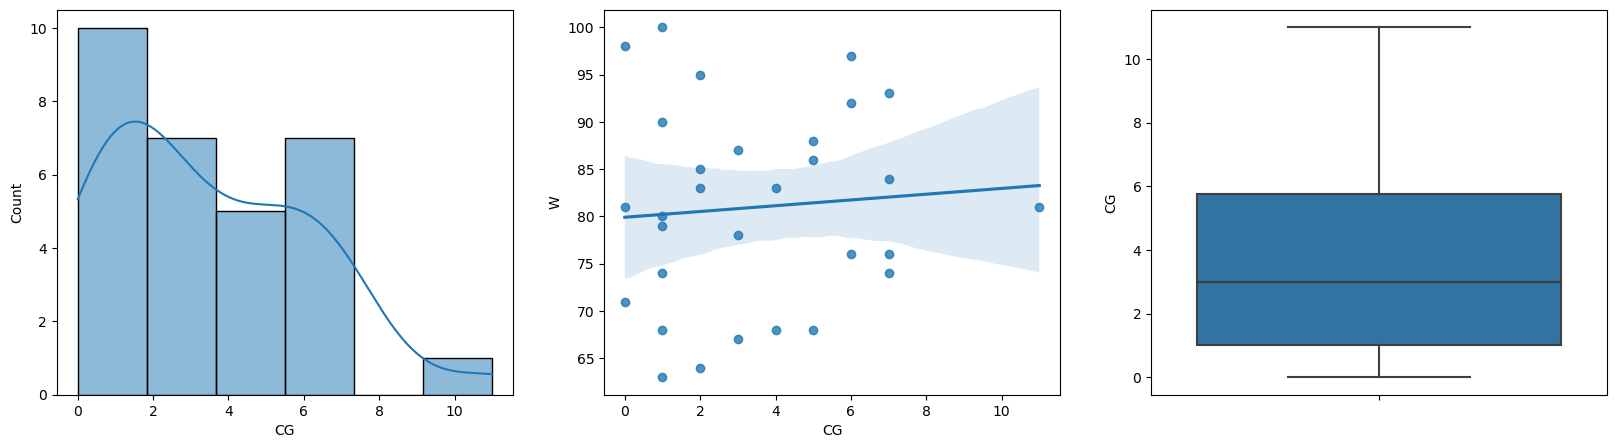

In [22]:
i = "CG"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Earned Run Average (ERA) is not correlated to win with no outliers and data is right-skewed.

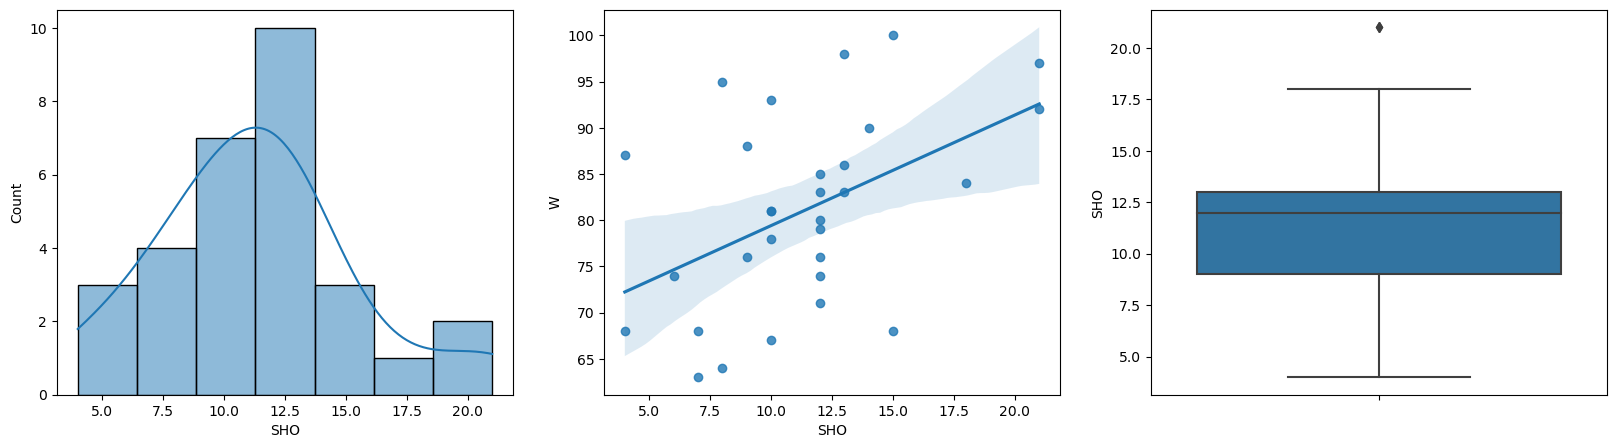

In [23]:
i = "SHO"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Shutouts are highly correlated to win with no outliers and data is right-skewed.

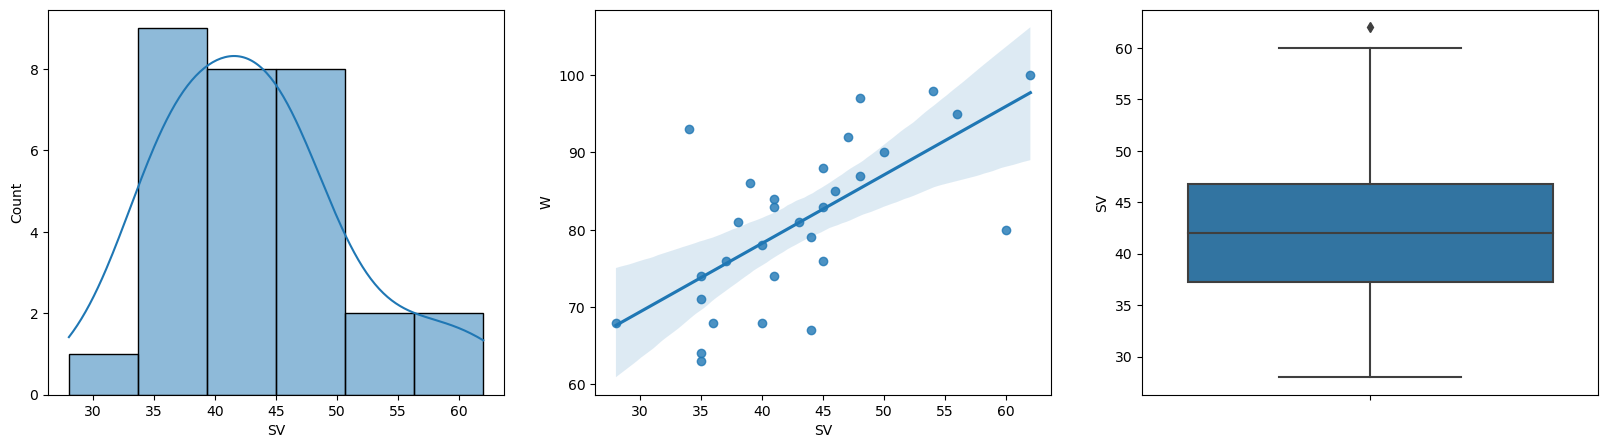

In [24]:
i = "SV"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Saves are lightly correlated to win with no outliers-skewed.

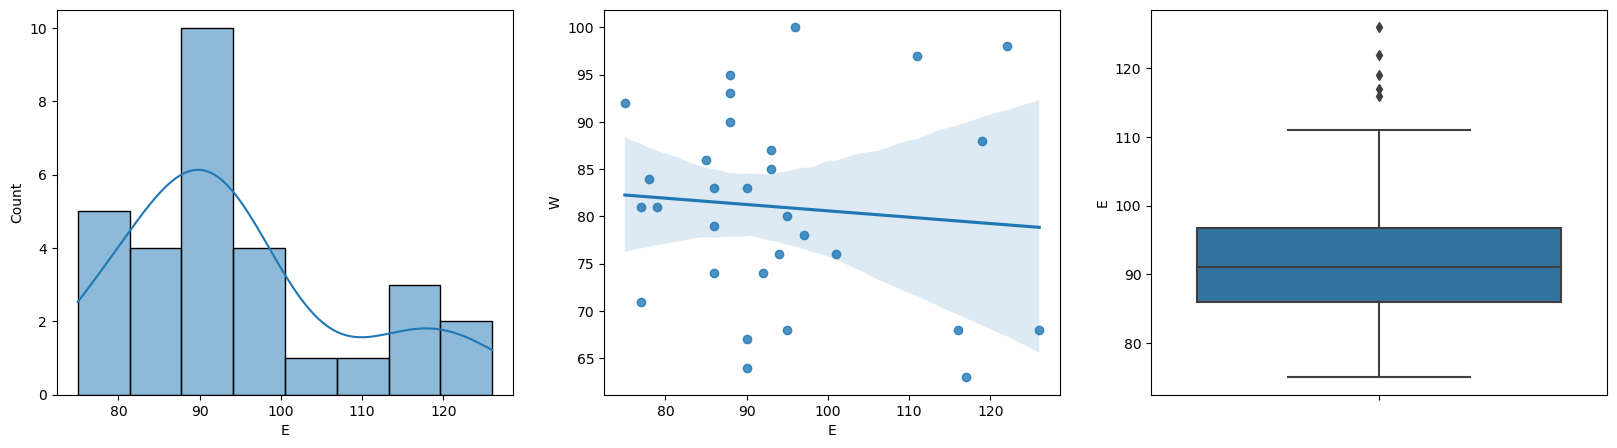

In [25]:
i = "E"
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i, y='W', data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

Errors are not correlated to win, the data has outliers and data is right-skewed.

# Z-score method

In [26]:
num = 'R'
z = np.abs(zscore(df[num]))
a = int(df.size)
df_z = df[(z > 3)]

it covert the dataset into z-sore and then check if absolute of z_score is greater than 3 then remove those data. In a standard normal distribution, 99.73% of data should lie within 3 standard deviations i.e 3(the standard, deviation is 1).

In [27]:
df_z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


In [28]:
print(type(df))
print(df.head())
print(num in df.columns)


<class 'pandas.core.frame.DataFrame'>
    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  
True


In [29]:
print(df[num])  # Check if the specified column exists in the DataFrame


0     724
1     696
2     669
3     622
4     689
5     891
6     764
7     713
8     644
9     748
10    751
11    729
12    661
13    656
14    694
15    647
16    697
17    689
18    655
19    640
20    683
21    703
22    613
23    573
24    626
25    667
26    696
27    720
28    650
29    737
Name: R, dtype: int64


# IQR method

In [30]:
Q1 = np.percentile(df["W"], 25,
interpolation = "midpoint")
Q3 = np.percentile(df["AB"], 75,
interpolation = "midpoint")
IQR = Q3 - Q1
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df["AB"] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df["CG"] <= (Q1-1.5*IQR))
#Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

Old Shape:  (30, 17)


IQR stands for the interquartile reason it uses percentile for outlier detection 50 percentile represents the median, 25 percentile represents the Q1, 75 percentile represents Q2.

# Data Reduction

This dataset has continuous independent value and dependent value. There are many technics for Data reduction.

# Pearson r correlation

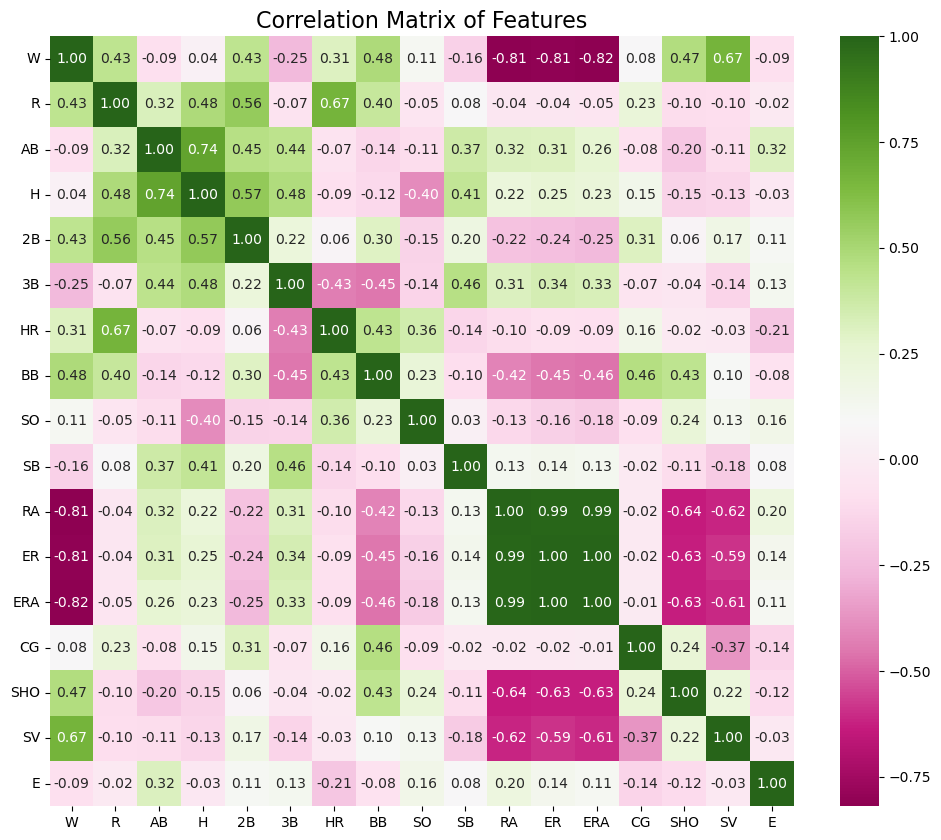

In [31]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Features', fontsize=16)
plt.yticks(rotation=0)
plt.show()

Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables.

# ANOVA

In [32]:
x = df.drop('W', axis=1)
y = df['E']
s = SelectKBest(f_classif, k=15)
s.fit(x,y)
anova=pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

In [33]:
anova

,0,1
SB,0.267227,0.993302
R,0.490958,0.911119
HR,0.534484,0.883321
H,0.689471,0.767072
SV,0.732644,0.732457
AB,0.844038,0.643842
BB,0.944765,0.567934
SO,0.946798,0.566462
3B,1.174152,0.419854
ERA,1.304644,0.352217


Analysis of variance (ANOVA) is an analysis tool used in statistics that splits an observed aggregate variability found inside a data set into two parts: systematic factors and random factors. The systematic factors have a statistical influence on the given data set, while the random factors do not. Analysts use the ANOVA test to determine the influence that independent variables have on the dependent variable in a regression study.

# R-squared (R2)

feature_0 is having r2 score of -0.13494757267749166
feature_1 is having r2 score of -0.12262005908072278
feature_2 is having r2 score of -0.11905662931452159
feature_3 is having r2 score of -0.08747345289456414
feature_4 is having r2 score of -0.05581646653223812
feature_7 is having r2 score of -0.04617555531142655


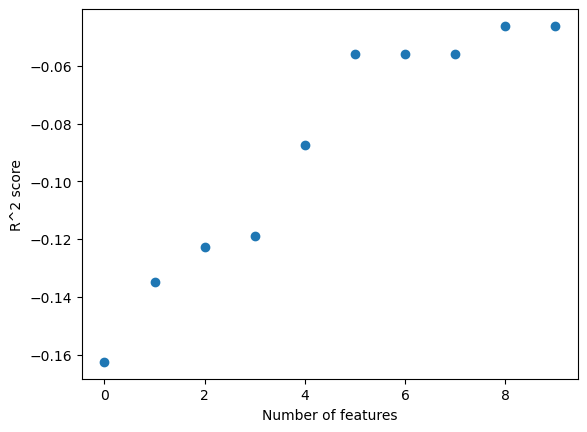

In [34]:
# Generate some random data
np.random.seed(0)
n_samples, n_features = 100, 10
x = pd.DataFrame(np.random.rand(n_samples, n_features), columns=[f"feature_{i}" for i in range(n_features)])
y = np.random.rand(n_samples)

# Normalize the features using StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert x_scaled to a DataFrame with column names
x_df = pd.DataFrame(x_scaled, columns=x.columns)

# Define the linear regression model
lr = LinearRegression()

# Perform cross-validation and calculate the mean R^2 score
cv_results = cross_validate(lr, x_scaled, y, cv=3, scoring='r2')
lr_reg = cv_results['test_score'].mean()

# Initialize the r2 list
r2 = []
r2.append(lr_reg)

# Initialize variables for while loop
j = 1
k = 1
least_r21 = -10

# While loop for feature selection
while j == 1:
    for i in x_df.columns:
        demo_x = x_df.drop(i, axis=1)
        if demo_x.empty:
            continue
        scaler = StandardScaler().fit(demo_x) # Fit a new scaler to the reduced input data
        demo_x_scaled = scaler.transform(demo_x)
        cv_results = cross_validate(lr, demo_x_scaled, y, cv=3, scoring='r2')
        lr_reg1 = cv_results['test_score'].mean()
        if lr_reg1 > lr_reg:
            least = i
            least_r2 = lr_reg1
            lr_reg = lr_reg1
        if least_r21 < least_r2:
            print(str(least) + ' is having r2 score of ' + str(least_r2))
            least_r21 = least_r2
        x_df = demo_x
        r2.append(lr_reg)
        k = k + 1
    else:
        j = 0

# Plot R^2 score vs. number of features
plt.scatter(range(k), r2)
plt.xlabel('Number of features')
plt.ylabel('R^2 score')
plt.show()

It is a statistical measure that represents the proportion of the variance for a dependent variable that is explained by an independent variable. R-squared explains to what extent the variance of the dependent variable explains the variance of the dependent variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model’s inputs.

preprocessing helps in reducing the noise or randomness from data. It consists of the following elements

1.Data Cleaning:- removing the Null value
2.Data Integration:- integrates data from a multitude of sources into a single data warehouse.
3.Data Transformation:- Transforming data such as standardization, normalization, encoding, etc
4.Data Reduction:- removing redundant data.

In [35]:
def num_cat(df):
    num = df.select_dtypes(include=['int64', 'float64']).columns
    cat = df.select_dtypes(include=['object', 'category']).columns
    return num, cat

In [36]:
num_cat(df)

(Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
        'ERA', 'CG', 'SHO', 'SV', 'E'],
       dtype='object'),
 Index([], dtype='object'))

# Split the data into training and testing sets

In [37]:
X = df.drop('W', axis=1)  
y = df['R']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training data
x_train_scaler = StandardScaler().fit(x_train)
x_train_scaled = x_train_scaler.transform(x_train)
x_test_scaled = x_train_scaler.transform(x_test)

# [LinearRegression(), RandomForestRegressor(), ExtraTreeRegressor(), GradientBoostingRegressor(), SVR()]

In [38]:
def clf(model, x, y, x_test, y_test):
    lr = model.fit(x, y)
    y_pred = lr.predict(x_test)
    print(confusion_matrix(y_test, np.round(y_pred)))
    print(accuracy_score(y_test, np.round(y_pred)))
    print(classification_report(y_test, np.round(y_pred)))
    lr_acc = f1_score(y_test, np.round(y_pred), average='macro')
    cv_results = cross_validate(model, x, y, cv=10)
    lr_score = cv_results['test_score'].mean()
    return lr_acc, lr_score

models = [LinearRegression(), RandomForestRegressor(), ExtraTreeRegressor(), GradientBoostingRegressor(), SVR()]
names = ['LR', 'RFR', 'XGR', 'GBR', 'SVR']
scores = []
errors = []
x_train_scaler = StandardScaler().fit(x_train)
x_train_scaled = x_train_scaler.transform(x_train)
x_test_scaled = x_train_scaler.transform(x_test)

for model in models:
    lr_acc, lr_score = clf(model, x_train_scaled, y_train, x_test_scaled, y_test)
    scores.append(lr_score)
    errors.append(lr_acc)

diff = [round(score - error, 2) for score, error in zip(scores, errors)]

result = pd.DataFrame([names, scores, errors, diff]).T
result.columns = ['Model', 'Score', 'Error', 'Difference']
result

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]
1.0
              precision    recall  f1-score   support

         573       1.00      1.00      1.00         1
         644       1.00      1.00      1.00         1
         647       1.00      1.00      1.00         1
         689       1.00      1.00      1.00         1
         720       1.00      1.00      1.00         1
         748       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]]
0.0
              precision    recall

,Model,Score,Error,Difference
0,LR,1.0,1.0,0.0
1,RFR,0.415982,0.0,0.42
2,XGR,-5.532163,0.0,-5.53
3,GBR,-0.503838,0.090909,-0.59
4,SVR,-3.84454,0.0,-3.84


Now after selecting the best algorithm now we should do Hyperparameter tuning for extreme gradient boosting.

# Random search cv And Grid search cv

In [39]:
ridge_params = {'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
xg_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
xg_grid.fit(x_train_scaled, y_train)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 0.9040605345911218
Best score: {'alpha': 1}
Best score: Ridge(alpha=1)


# Concluding Remarks

As discussed in EDA and storytelling the randomness of the dataset should be reduced by reducing the number of variables. Which was done by R-square dimension reduction.

The root means square is 0.08 and the R-square value is 91.2.